# The Adult Income dataset

### Description

Title of dataset: adult.csv

Sources:

    * Original owners of database - US Census Bureau
    * Donor of database - Ronny Kohavi and Barry Becker
    * Date received - 05/19/96 
    
Number of Instances

    * 48842 instances, mix of continuous and discrete (train=32561, test=16281)
    * 45222 if instances with unknown values are removed (train=30162, test=15060)
    * Split into train-test using MLC++ GenCVFiles (2/3, 1/3 random).

Number of Attributes/Fearures/Columns

    * 6 continuous, 8 nominal attributes. 

Attribute Information/Fearures/Columns

    * age: continuous.
    * workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
    * fnlwgt: continuous.
    * education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
    * education-num: continuous.
    * marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
    * occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
    * relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
    * race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
    * sex: Female, Male.
    * capital-gain: continuous.
    * capital-loss: continuous.
    * hours-per-week: continuous.
    * native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
    * income: >50K, <=50K 
    
Missing Values:
     
     7% rows have missing values. 

# Load data and display the head, shape and description of the data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [2]:
adt=pd.read_csv('adult.csv')

In [3]:
adt.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
adt.tail()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [5]:
adt.shape

(48842, 15)

In [6]:
print('No. of Rows : ',adt.shape[0])
print('No. of Column : ',adt.shape[1])

No. of Rows :  48842
No. of Column :  15


In [7]:
adt.describe(include='all')

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
count,48842.000000,48842,4.884200e+04,48842,48842.000000,48842,48842,48842,48842,48842,48842.000000,48842.000000,48842.000000,48842,48842
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33906,NaN,15784,NaN,22379,6172,19716,41762,32650,NaN,NaN,NaN,43832,37155
mean,38.643585,NaN,1.896641e+05,NaN,10.078089,NaN,NaN,NaN,NaN,NaN,1079.067626,87.502314,40.422382,NaN,NaN
std,13.710510,NaN,1.056040e+05,NaN,2.570973,NaN,NaN,NaN,NaN,NaN,7452.019058,403.004552,12.391444,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.175505e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.781445e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.376420e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


# 3. Handling the Missing Value

In [8]:
adt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [9]:
missing_val={'n/a','-','?'}
adt=pd.read_csv('adult.csv',na_values=missing_val)
adt.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [10]:
adt.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [11]:
#remove fnlwgt column to adult dataset
adt=adt.drop('fnlwgt',axis=1)

In [12]:
adt.head()

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [13]:
adt.shape

(48842, 14)

In [14]:
temp=len(adt.index)
temp

48842

In [15]:
#remove rows where missing value is present
adt=adt.dropna(axis=0,how='any')

In [16]:
adt.shape

(45222, 14)

In [17]:
adt.describe()

,age,educational-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,10.118460,1101.430344,88.595418,40.938017
std,13.217870,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [18]:
adt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48841
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              45222 non-null  int64 
 1   workclass        45222 non-null  object
 2   education        45222 non-null  object
 3   educational-num  45222 non-null  int64 
 4   marital-status   45222 non-null  object
 5   occupation       45222 non-null  object
 6   relationship     45222 non-null  object
 7   race             45222 non-null  object
 8   gender           45222 non-null  object
 9   capital-gain     45222 non-null  int64 
 10  capital-loss     45222 non-null  int64 
 11  hours-per-week   45222 non-null  int64 
 12  native-country   45222 non-null  object
 13  income           45222 non-null  object
dtypes: int64(5), object(9)
memory usage: 5.2+ MB


In [19]:
#percentage of rows that removed
row=temp-len(adt)
per_row=row/temp*100
print('percentage of rows that removed',per_row)

percentage of rows that removed 7.411653904426519


# 4. Univariate Analysis

# PDF

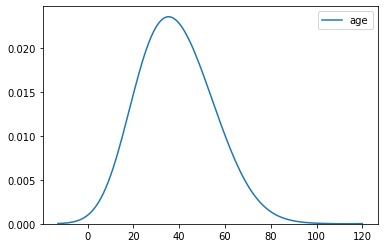

In [20]:
sns.kdeplot(adt['age'],bw=10)

# Observation:-
    the above kdeplot of age is normal distibution.
    

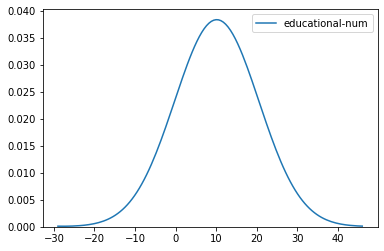

In [21]:
sns.kdeplot(adt['educational-num'],bw=10)

# Observation:-
    the above kdeplot of edducational-num is normal distibution.

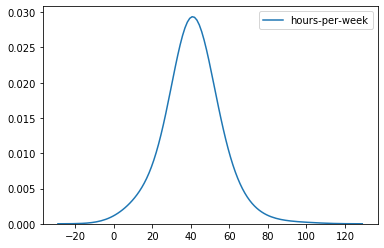

In [22]:
sns.kdeplot(adt['hours-per-week'],bw=10)

# Observation:-
    the above kdeplot of hours-per-week is normal distibution.

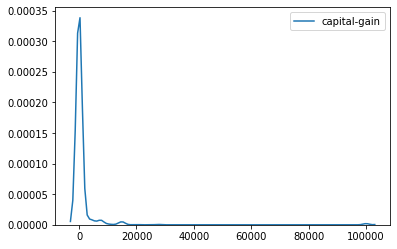

In [23]:
sns.kdeplot(adt['capital-gain'],bw=1000)

# Observation:-
    the above kdeplot of capital-gain is normal distibution.

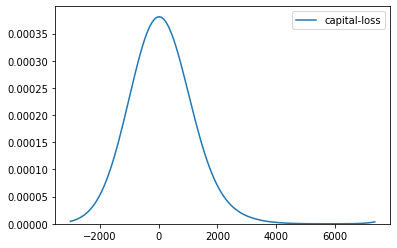

In [24]:
sns.kdeplot(adt['capital-loss'],bw=1000)

# Observation:-
    the above kdeplot of capital-loss is normal distibution.

# Frequency Distribution

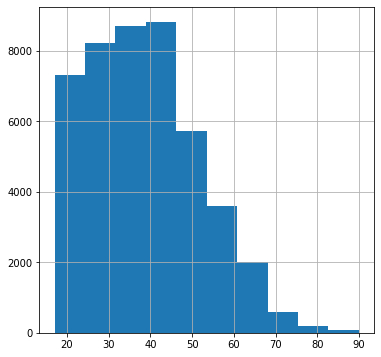

In [25]:
adt['age'].hist(figsize=(6,6))
plt.show()

# Observation:-
    Minimum and Maximum no. of people age is 17 and 90 respectivily.
    

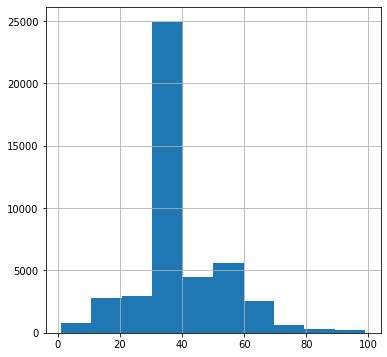

In [26]:
adt['hours-per-week'].hist(figsize=(6,6))
plt.show()

# Observation:-
    * Most of people work 30 to 40 hours in week
    * There are few people who work 80 to 99 hours and some work less than 20 hours in week.

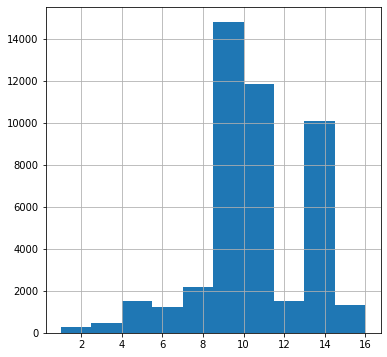

In [27]:
adt['educational-num'].hist(figsize=(6,6))
plt.show()

# Observation:-
    * The Education-num values lies 1 to 16.
    * minimum and maximum value of educational-num is 1 and 16.

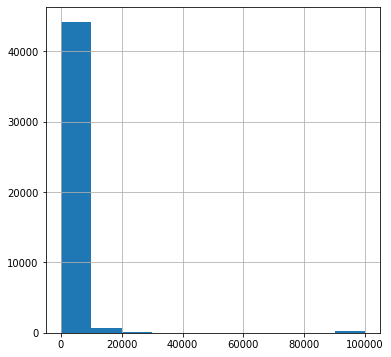

In [28]:
adt['capital-gain'].hist(figsize=(6,6))
plt.show()

# Observation:-
    In capital-gain most of values are 0 and some of 10k,99k.

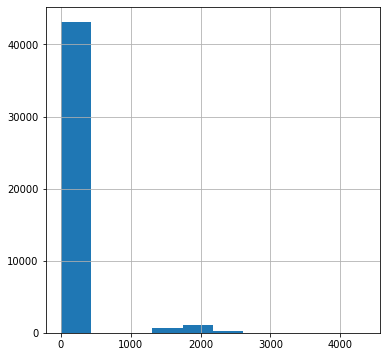

In [29]:
adt['capital-loss'].hist(figsize=(6,6))
plt.show()

# Observation:-
    In capital-loss most of values are 0 and some are lies between 15k to 25k

# Box Plot(Numerical Variables)

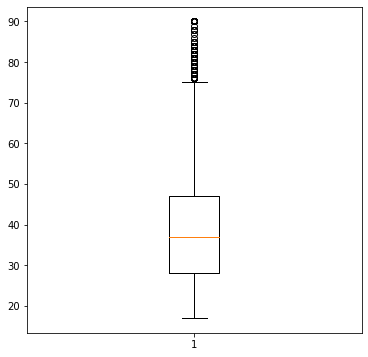

In [30]:
plt.figure(figsize=(6,6))
plt.boxplot(adt['age'])
plt.show()


# Obervation
 The above univariate boxplot shows:
        * outliers present in 'age' column.
        * median of age column is around 37.
        * Qurtile(Q1)is around 28 and Qurtile(Q3) is around 47
        

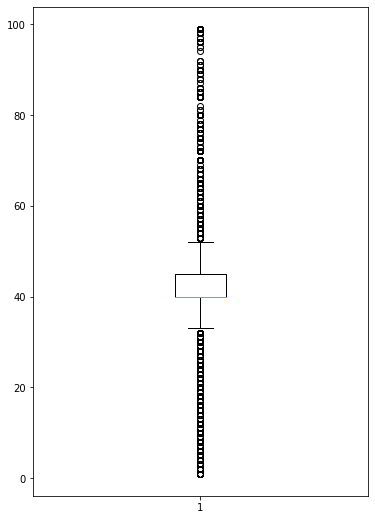

In [31]:
plt.figure(figsize=(6,9))
plt.boxplot(adt['hours-per-week'])
plt.show()

# Obervation
 The above univariate boxplot shows:
        * outliers present in 'hours-per-week' column.
        * median and Q1 is same for 'hours-per-week' column and their value is around 40.
        * Qurtile(Q3) is around 45

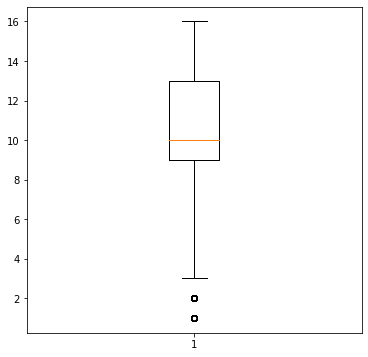

In [32]:
plt.figure(figsize=(6,6))
plt.boxplot(adt['educational-num'])
plt.show()

# Obervation
 The above univariate boxplot shows:
        * some outliers present in 'educational-num' column as compared to 'age' and 'hours-per-week' column.
        * median of educational-num column is around 10.
        * Qurtile(Q1)is around 9 and Qurtile(Q3) is around 13. So the IQR is around 4

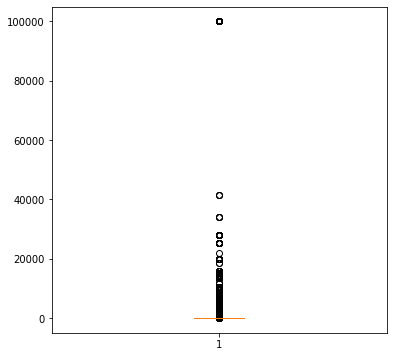

In [33]:
plt.figure(figsize=(6,6))
plt.boxplot(adt['capital-gain'])
plt.show()

# Obervation
 The above univariate boxplot shows:
        * Extremly large no. of outliers present in 'Capital-gain' column.
        * median of 'capital-gain' column is 0 because most of the capital gain values accumulated at 0


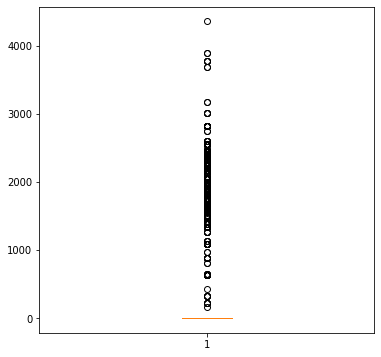

In [34]:
plt.figure(figsize=(6,6))
plt.boxplot(adt['capital-loss'])
plt.show()

# Obervation
 The above univariate boxplot shows:
        * Extremly large no. of outliers present in 'Capital-loss' column.
        * median of 'capital-loss' column is 0 because most of the capital loss values is 0


# Count plot(Categorical Variables)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

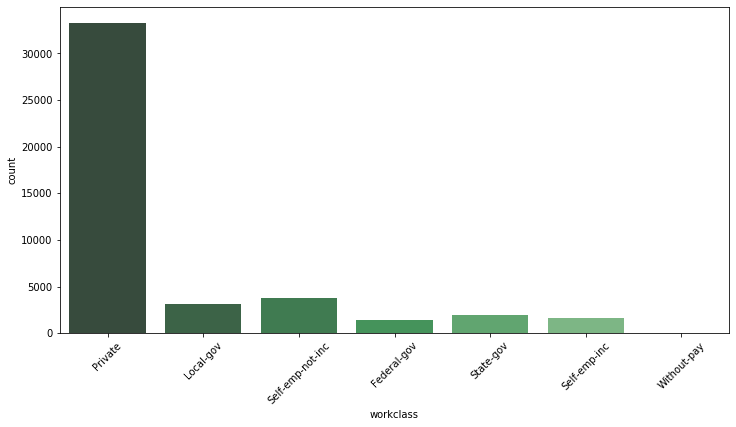

In [35]:
plt.figure(figsize=(12,6))
sns.countplot(x='workclass', data=adt, palette='Greens_d')
plt.xticks(rotation=45)

# Obervation
 The above univariate countplot shows:
        * There are 7 unique categories present in 'workclass' column.
        * Private workclass has maximum count in 'workclass' column.
        * without-pay workclass has minimum count in 'workclass' column.
 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

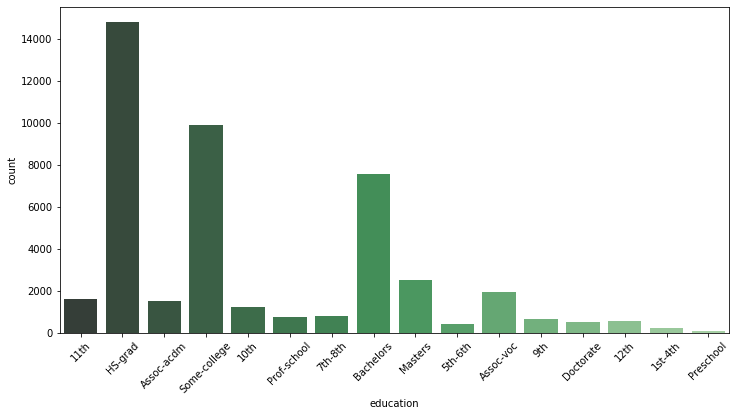

In [36]:
plt.figure(figsize=(12,6))
sns.countplot(x='education', data=adt, palette='Greens_d')
plt.xticks(rotation=45)

# Obervation
 The above univariate countplot shows:
        * There are 16 unique categories present in 'education' column.
        * Hs-grad has maximum count in 'education' column.
        * preschool has minimum count in 'education' column.
 

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

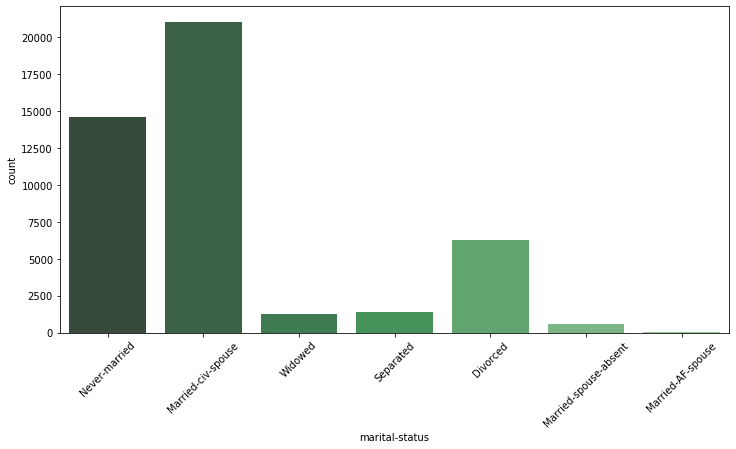

In [37]:
plt.figure(figsize=(12,6))
sns.countplot(x='marital-status', data=adt, palette='Greens_d')
plt.xticks(rotation=45)

# Obervation
 The above univariate countplot shows:
        * There are 7 unique categories present in 'marital-status' column.
        * Married-civ-spouse has maximum count in 'marital-status' column.
        * Married-AF-spouse has minimum count in 'marital-status' column.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

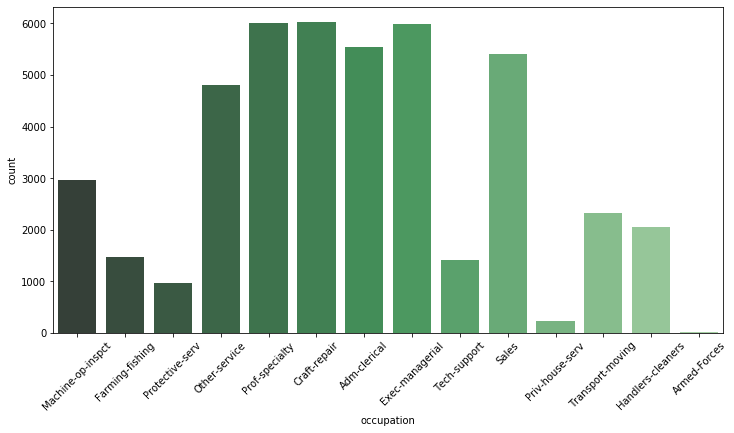

In [38]:
plt.figure(figsize=(12,6))
sns.countplot(x='occupation', data=adt, palette='Greens_d')
plt.xticks(rotation=45)

# Obervation
 The above univariate countplot shows:
        * There are 14 unique categories present in 'occupation' column.
        * Prof-specialty and Craft-repair almost same count in 'occupation' column.
        * Armed-Forces has minimum count in 'occupation' column.

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

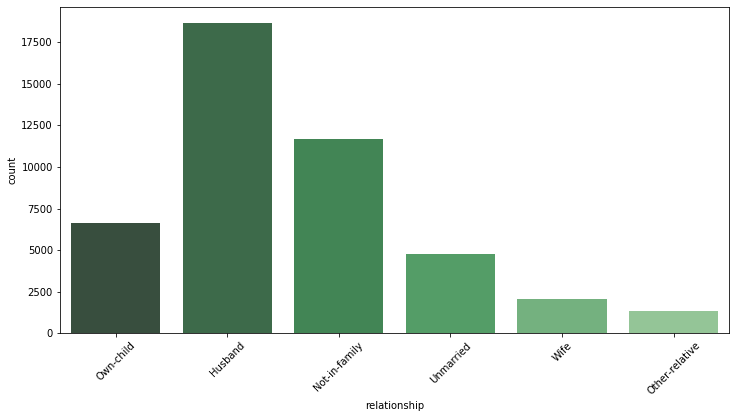

In [39]:
plt.figure(figsize=(12,6))
sns.countplot(x='relationship', data=adt, palette='Greens_d')
plt.xticks(rotation=45)

# Obervation
 The above univariate countplot shows:
        * There are 6 unique categories present in 'relationship' column.
        * Husband has maximum count in 'relationship' column.
        * Other-relative has minimum count in 'relationship' column.

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

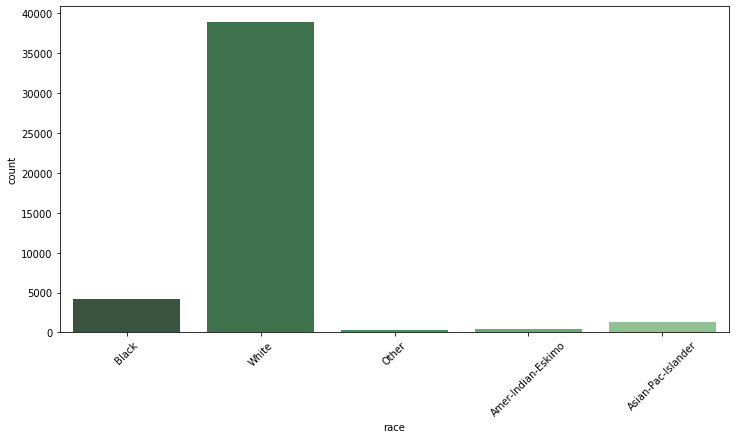

In [40]:
plt.figure(figsize=(12,6))
sns.countplot(x='race', data=adt, palette='Greens_d')
plt.xticks(rotation=45)

# Obervation
 The above univariate countplot shows:
        * There are 5 unique categories present in 'race' column.
        * White has maximum count in 'race' column.
        * Other and Amer-Indian-Eskimo almost same count in 'race' column.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 <a list of 41 Text xticklabel objects>)

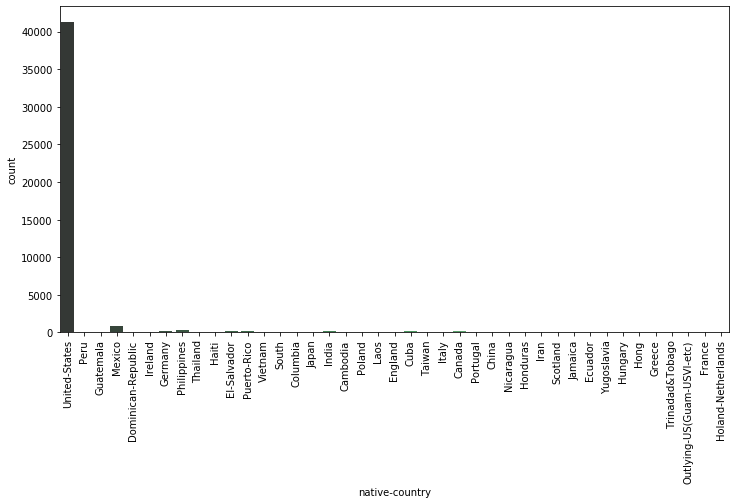

In [41]:
plt.figure(figsize=(12,6))
sns.countplot(x='native-country', data=adt, palette='Greens_d')
plt.xticks(rotation=90)

# Obervation
 The above univariate countplot shows:
        * Us has maximum count in 'native-country' column as compare to others native country

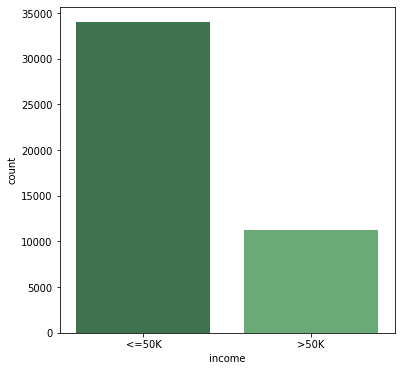

In [42]:
plt.figure(figsize=(6,6))
sns.countplot(x='income', data=adt, palette='Greens_d')

# Obervation
 The above univariate countplot shows:
        * There are 2 unique categories present in 'income' column.
        * income(<=50k) has maximum count in 'income' column as compared to income(>50k).


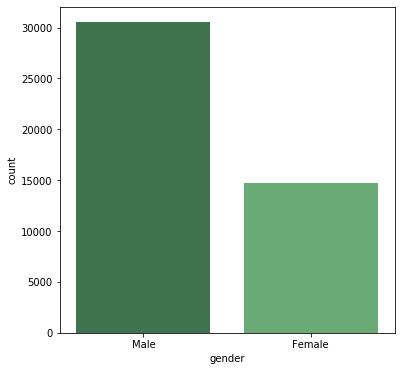

In [43]:
plt.figure(figsize=(6,6))
sns.countplot(x='gender', data=adt, palette='Greens_d')

# Obervation
 The above univariate countplot shows:
        * There are 2 unique categories present in 'gender' column.
        * Male is higher frequency as compared t0 Female in 'gender' column.


# 4. Bivariate Analysis

# 4.1 Scatter plot

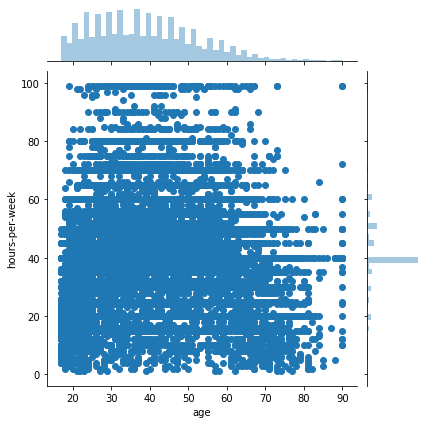

In [44]:
sns.jointplot(x='age',y='hours-per-week',kind='scatter',data=adt)

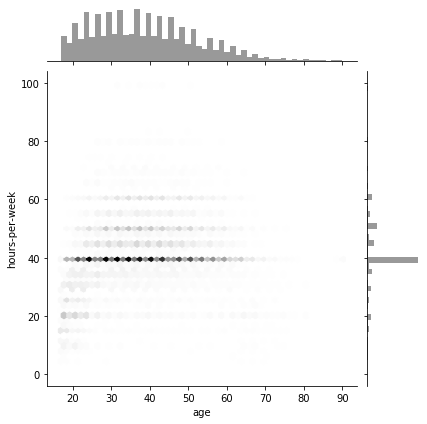

In [45]:
sns.jointplot(x='age',y='hours-per-week',kind='hex',data=adt,color='k')

# obervation
 the above scatter plot show
    * In age and hours-per-week higher density point lies between 20 t0 55 age and 40 hours.
    
 the above hexplot show
    * Dark black point show higher denstiy of points in hexbin plot of age and hours-per-week.
    * people has age greater than 60 working hours is less.

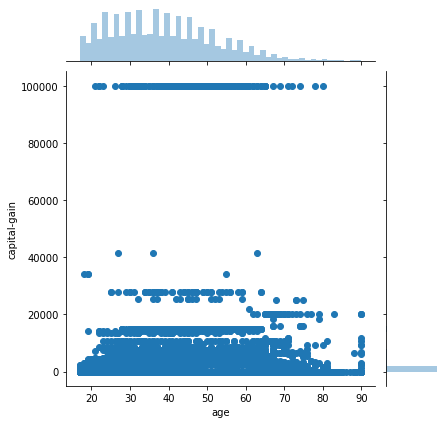

In [46]:
sns.jointplot(x='age',y='capital-gain',kind='scatter',data=adt)

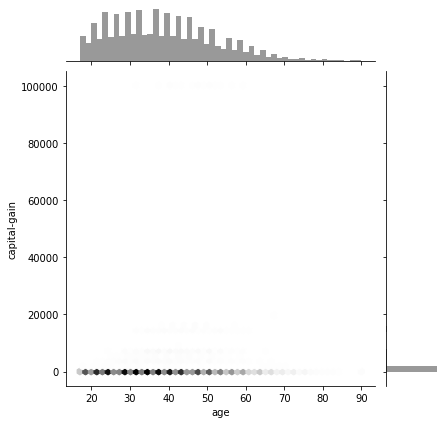

In [47]:
sns.jointplot(x='age',y='capital-gain',kind='hex',data=adt,color='k')

# Obervation:
    * people of age between 20 to 90 has same capital-gain. 

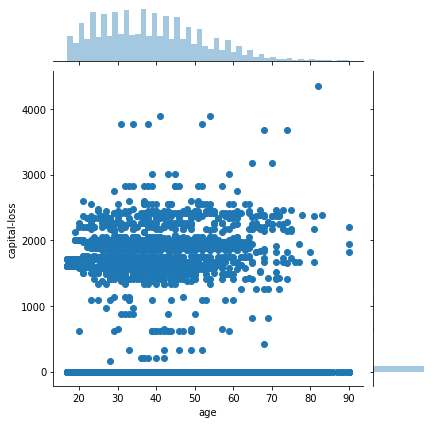

In [48]:
sns.jointplot(x='age',y='capital-loss',kind='scatter',data=adt)

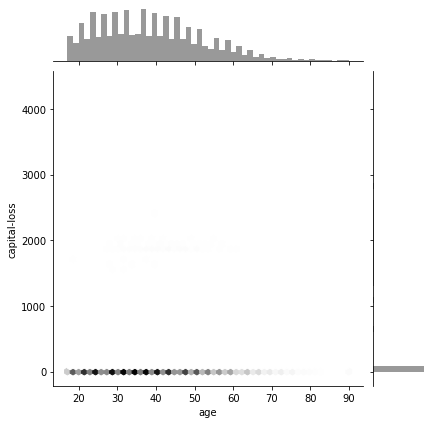

In [49]:
sns.jointplot(x='age',y='capital-loss',kind='hex',data=adt,color='k')

# Obervation:
    * people of age between 20 to 90 has same capital-loss. 

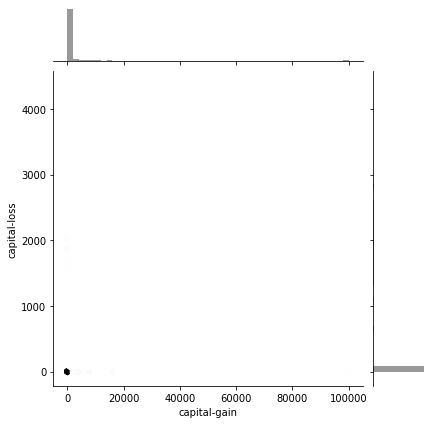

In [50]:
sns.jointplot(x='capital-gain',y='capital-loss',kind='hex',data=adt,color='k')

# Obervation:
    * Capital-gain and Capital-less has almost same value 0. 

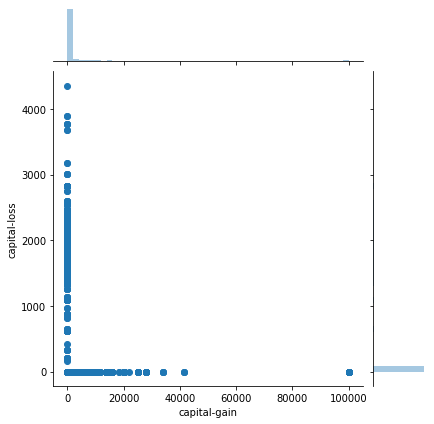

In [51]:
sns.jointplot(x='capital-gain',y='capital-loss',kind='scatter',data=adt)

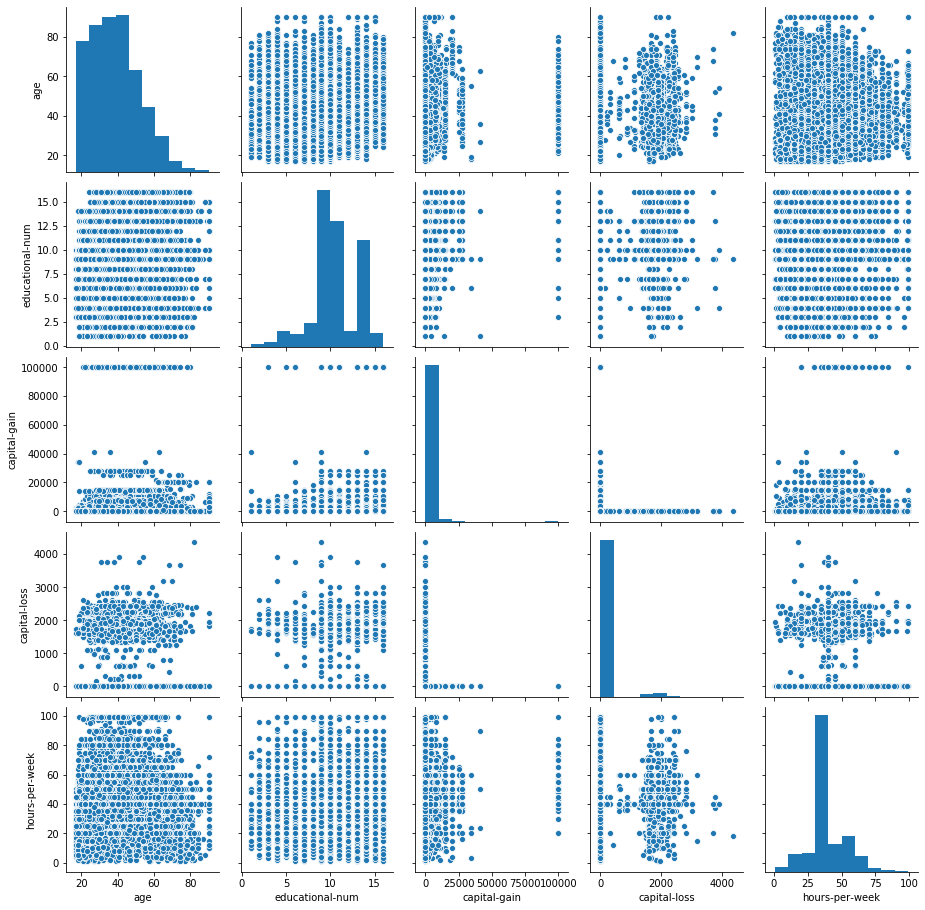

In [52]:
sns.pairplot(adt)

# Box Plot

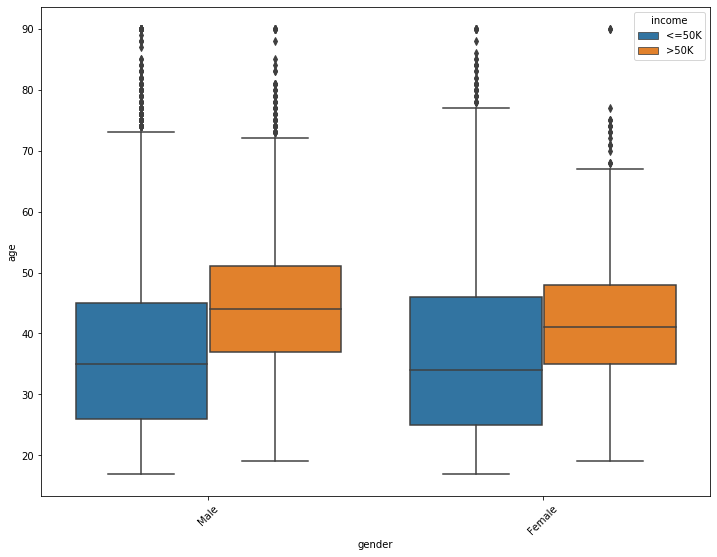

In [53]:
plt.figure(figsize=(12,9))
sns.boxplot(data = adt, x='gender', y='age',hue='income')
plt.xticks(rotation=45)
plt.show()

# Obervation:-
    the above boxplot show:
        * In Male group median of age of income(>50k) is greater than income(<=50k)
        * In Female group median of age of income(>50k) is greater than income(<=50k)

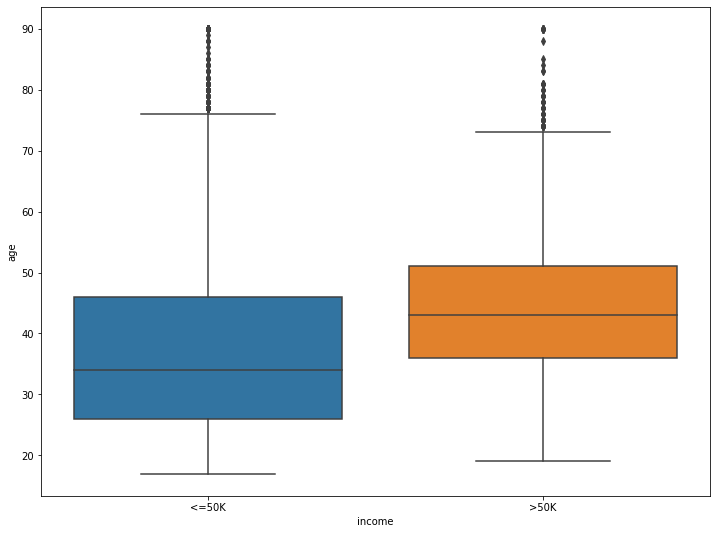

In [54]:
plt.figure(figsize=(12,9))
sns.boxplot(data = adt, x='income', y='age')
plt.show()

# Obervation:-
    the above boxplot show:
        * Median of age of income(>50k) is greater than income(<=50k)

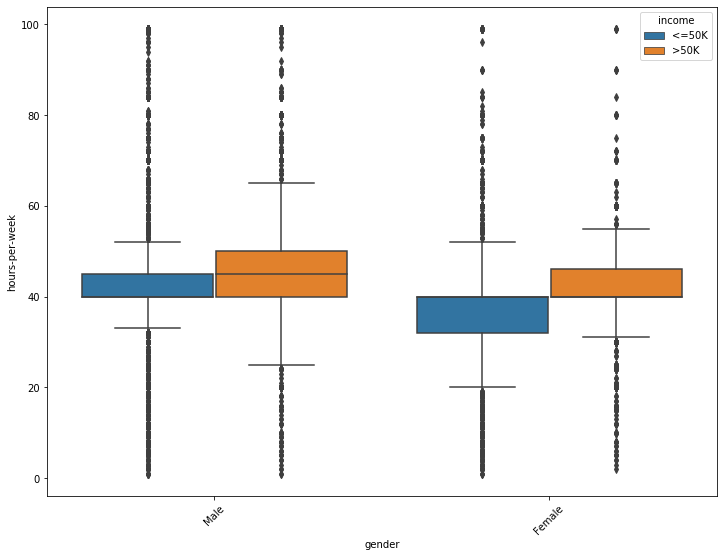

In [55]:
plt.figure(figsize=(12,9))
sns.boxplot(data = adt, x='gender', y='hours-per-week',hue='income')
plt.xticks(rotation=45)
plt.show()

# Obervation:-
    the above boxplot show:
        * In Male group median of hours-per-week of income(>50k) is greater than income(<=50k)
        * In Female group median of hours-per-week of income(>50k) is greater than income(<=50k)

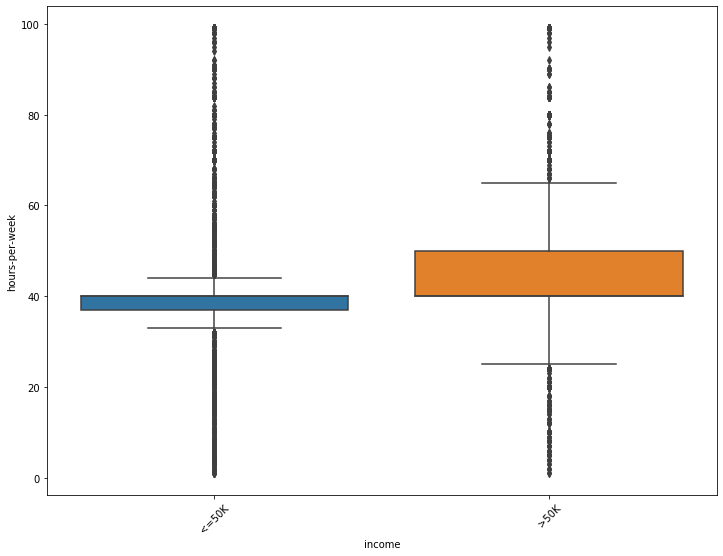

In [56]:
plt.figure(figsize=(12,9))
sns.boxplot(data = adt, x='income', y='hours-per-week')
plt.xticks(rotation=45)
plt.show()

# Obervation:-
    the above boxplot show:
        * Median of hours-per-week of income(>50k) is greater than income(<=50k)
        * there so much outliers present hours-per-week of income(<=50k) as compared to income(>50k)

# Bar Plot

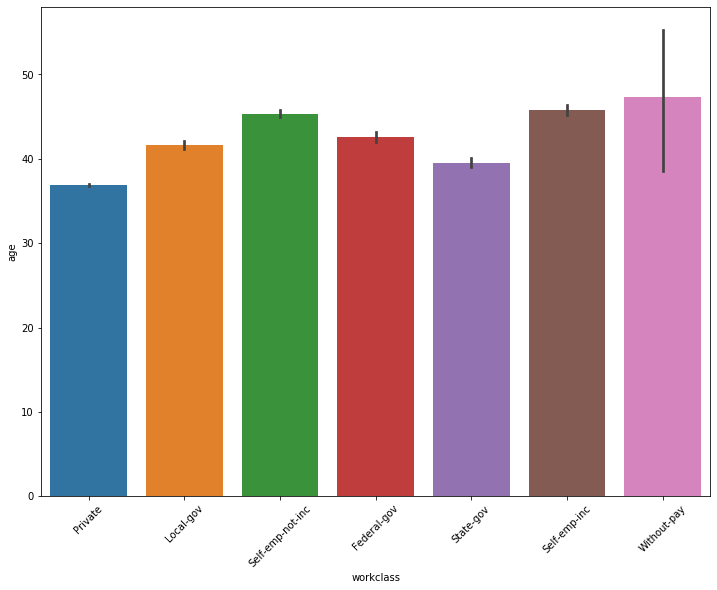

In [57]:
plt.figure(figsize=(12,9))
sns.barplot(data = adt, x='workclass', y='age')
plt.xticks(rotation=45)
plt.show()

# Obervation
 the above bivariate barplot show:
        * Averge age of 7 unique categories in workclass attribute.
        * without-pay has maximum average age around 47 in workclass attribute.
        * private has minimum average age around 37 in workclass attribute.

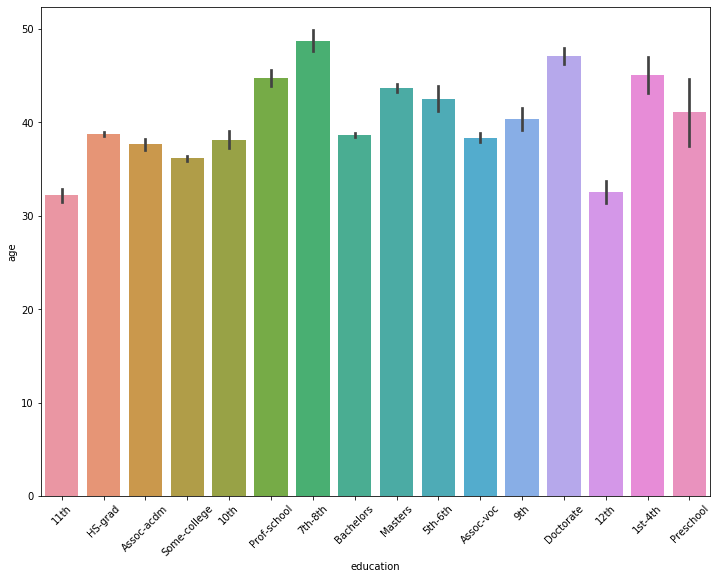

In [58]:
plt.figure(figsize=(12,9))
sns.barplot(data = adt, x='education', y='age')
plt.xticks(rotation=45)
plt.show()

# Obervation
 the above bivariate barplot show:
        * Averge age of 16 unique categories in education attribute.
        * 7th-8th has maximum average age around 48 in education attribute.
        * 11th and 12th almost same average age around 32 in education attribute.

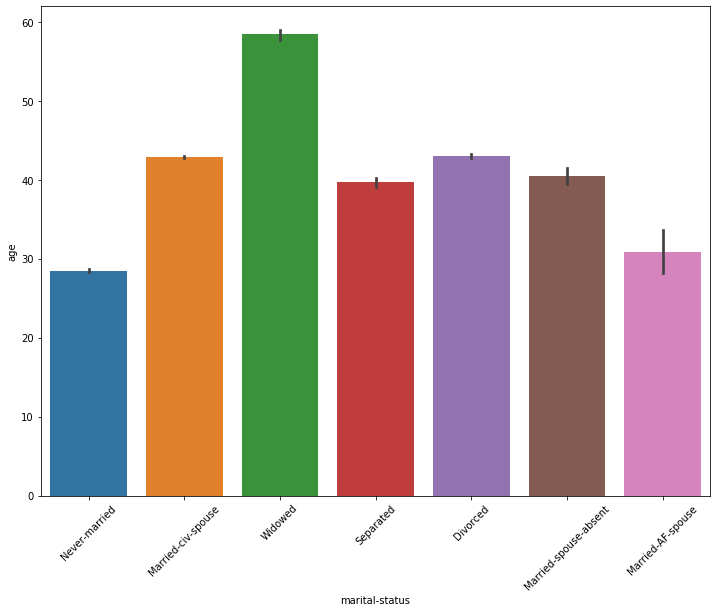

In [59]:
plt.figure(figsize=(12,9))
sns.barplot(data = adt, x='marital-status', y='age')
plt.xticks(rotation=45)
plt.show()

# Obervation
 the above bivariate barplot show:
        * Averge age of 7 unique categories in marital-status attribute.
        * widowed has maximum average age around 58 in marital-status attribute.
        * Never-married has minimum average age around 29 in marital-status attribute.

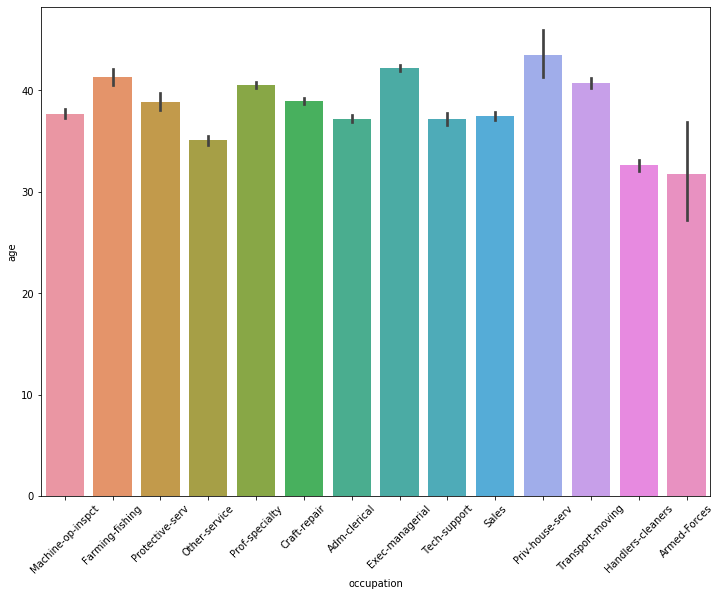

In [60]:
plt.figure(figsize=(12,9))
sns.barplot(data = adt, x='occupation', y='age')
plt.xticks(rotation=45)
plt.show()

# Obervation
 the above bivariate barplot show:
        * Averge age of 14 unique categories in occupation attribute.
        * priv-house-serv has maximum average age around 45 in occupation attribute.
        * Armed-Forces has minimum average age around 33 in occupation attribute.

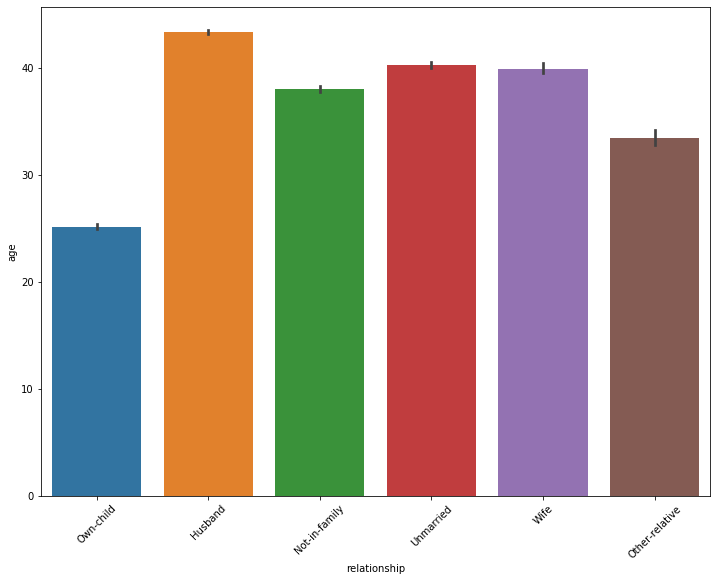

In [61]:
plt.figure(figsize=(12,9))
sns.barplot(data = adt, x='relationship', y='age')
plt.xticks(rotation=45)
plt.show()

# Obervation
 the above bivariate barplot show:
        * Averge age of 6 unique categories in relationship attribute.
        * Husband has maximum average age around 45 in relationship attribute.
        * own-child has minimum average age around 25 in relationship attribute.

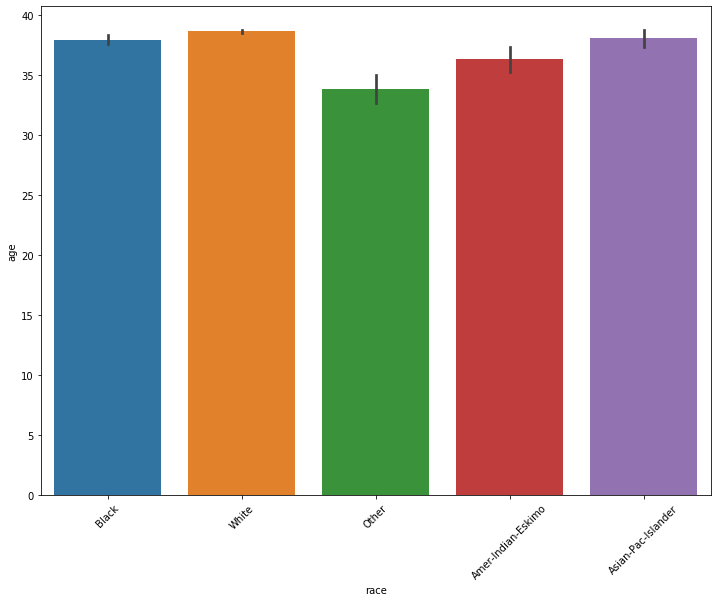

In [62]:
plt.figure(figsize=(12,9))
sns.barplot(data = adt, x='race', y='age')
plt.xticks(rotation=45)
plt.show()

# Obervation
 the above bivariate barplot show:
        * Averge age of 5 unique categories in race attribute.
        * white has maximum average age around 35 in race attribute.
        * other has minimum average age around 34 in race attribute.
        * Black and Asian-pac-islander has almost same average age around 37 in race attribute.

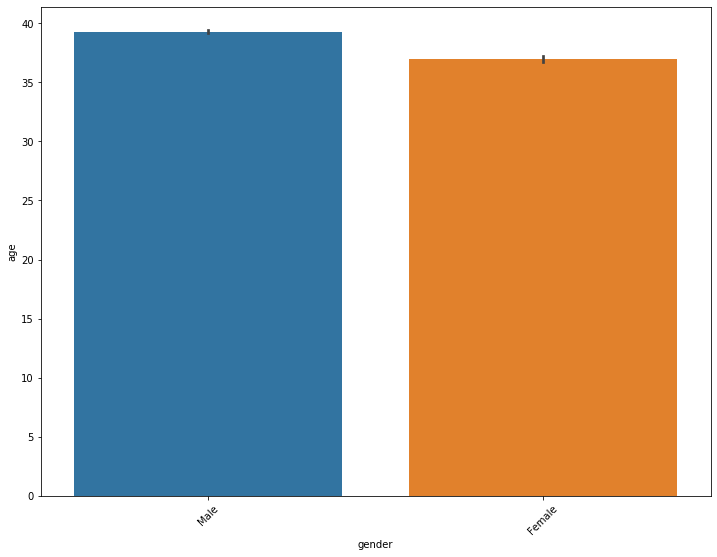

In [63]:
plt.figure(figsize=(12,9))
sns.barplot(data = adt, x='gender', y='age')
plt.xticks(rotation=45)
plt.show()

# Obervation
 the above bivariate barplot show:
        * Averge age of 2 unique categories in gender attribute.
        * Male has maximum average age around 39 in gender attribute.
        * Female has minimum average age around 37 in gender attribute.

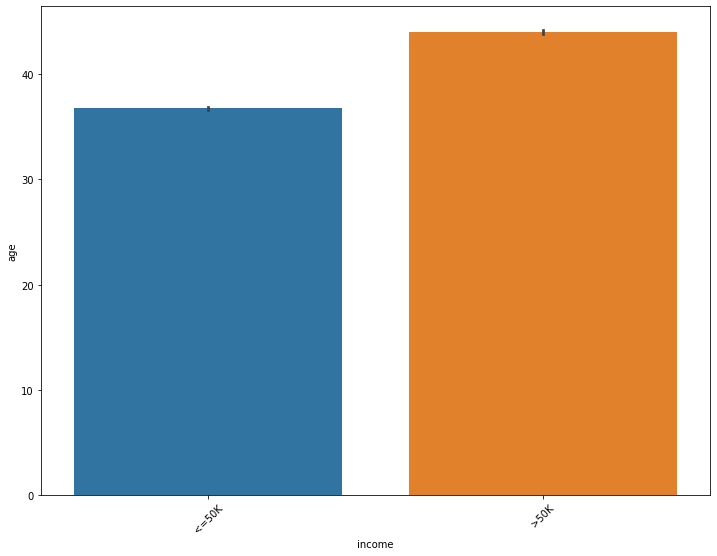

In [64]:
plt.figure(figsize=(12,9))
sns.barplot(data = adt, x='income', y='age')
plt.xticks(rotation=45)
plt.show()

# Obervation
 the above bivariate barplot show:
        * Averge age of 2 unique categories in Income attribute.
        * income(>50k) has maximum average age around 45 in income attribute.
        * income(<=50k) has minimum average age around 37 in income attribute.

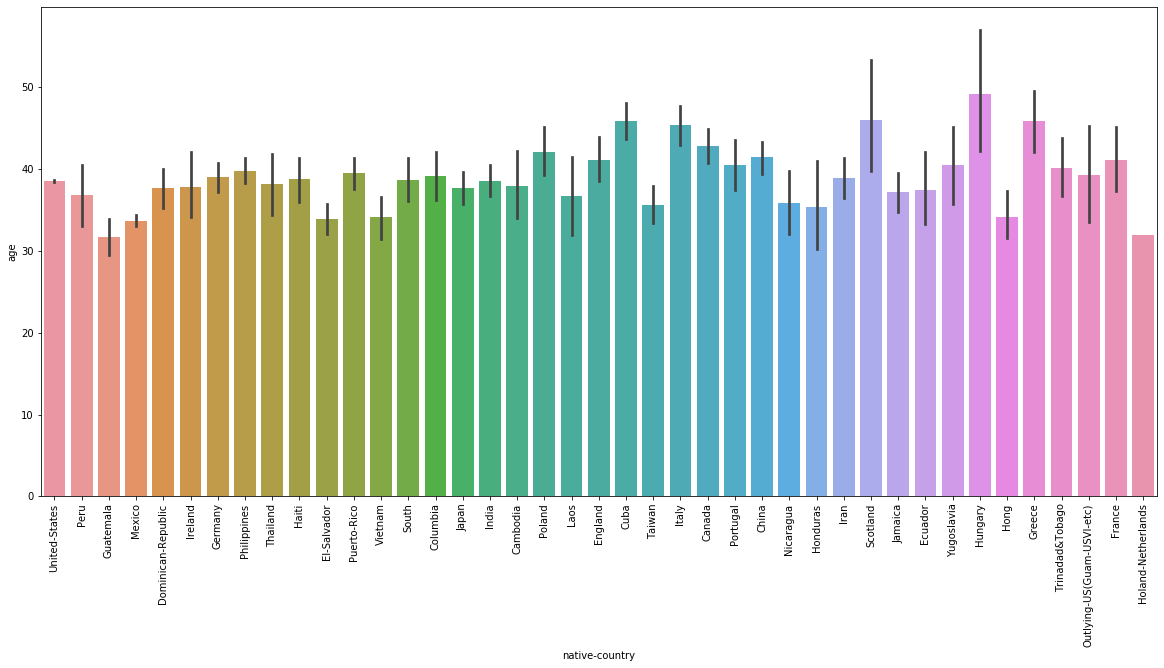

In [65]:
plt.figure(figsize=(20,9))
sns.barplot(data = adt, x='native-country', y='age')
plt.xticks(rotation=90)
plt.show()

# Obervation
 the above bivariate barplot show:
        * Hungary has maximum average age around 49 in native-country attribute.
        * Holand-Netherlands has minimum average age around 30 in native-country attribute.

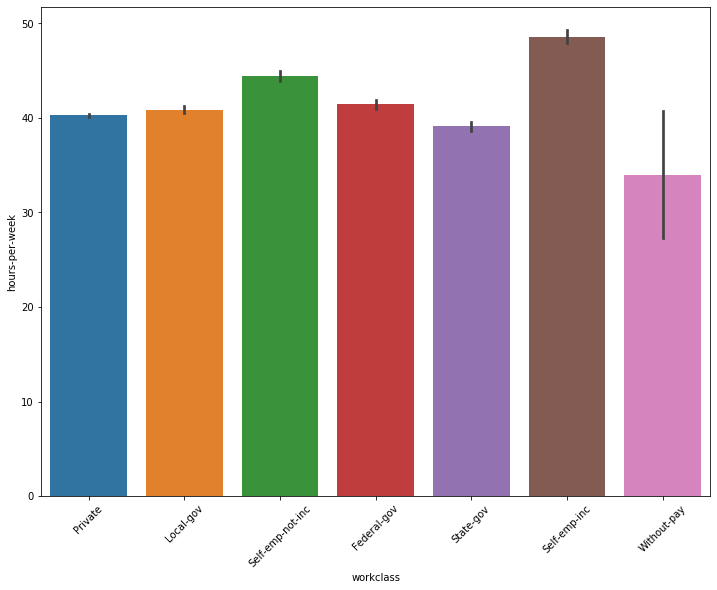

In [66]:
plt.figure(figsize=(12,9))
sns.barplot(data = adt, x='workclass', y='hours-per-week')
plt.xticks(rotation=45)
plt.show()

# Obervation
 the above bivariate barplot show:
        * Averge working hours-per-week of 7 unique categories in workclass attribute.
        * Self-emp-inc has maximum average working hours-per-week around 48 in workclass attribute.
        * without-pay has minimum average working hours-per-week around 34 in workclass attribute.

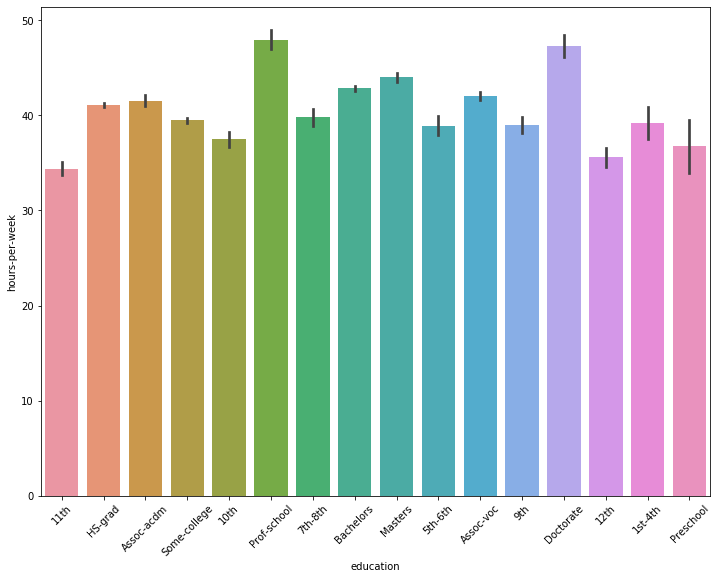

In [67]:
plt.figure(figsize=(12,9))
sns.barplot(data = adt, x='education', y='hours-per-week')
plt.xticks(rotation=45)
plt.show()

# Obervation
 the above bivariate barplot show:
        * Averge working hours-per-week of 16 unique categories in education attribute.
        * Prof-school has maximum average working hours-per-week around 48 in education attribute.
        * 11th has minimum average working hours-per-week around 35 in eduaction attribute.

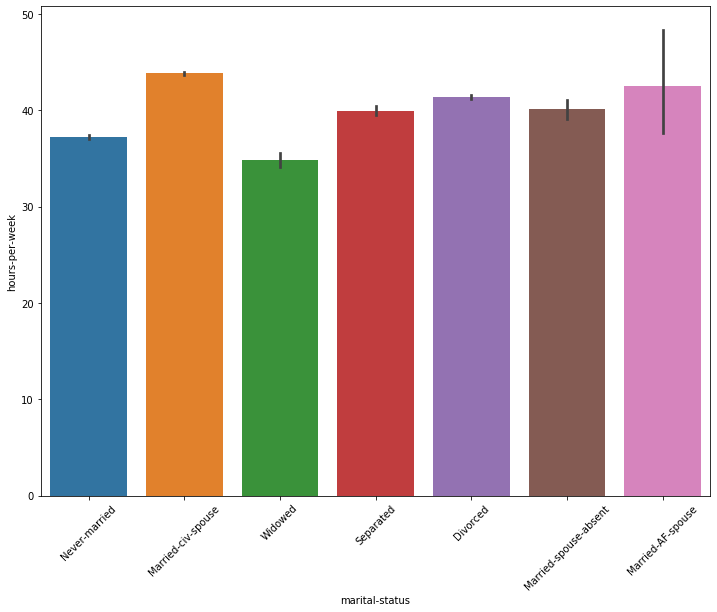

In [68]:
plt.figure(figsize=(12,9))
sns.barplot(data = adt, x='marital-status', y='hours-per-week')
plt.xticks(rotation=45)
plt.show()

# Obervation
 the above bivariate barplot show:
        * Averge working hours-per-week of 7 unique categories in marital-status attribute.
        * Married-civ-spouse has maximum average working hours-per-week around 44 in marital-status attribute.
        * widowed has minimum average working hours-per-week around 34 in marital-status attribute.

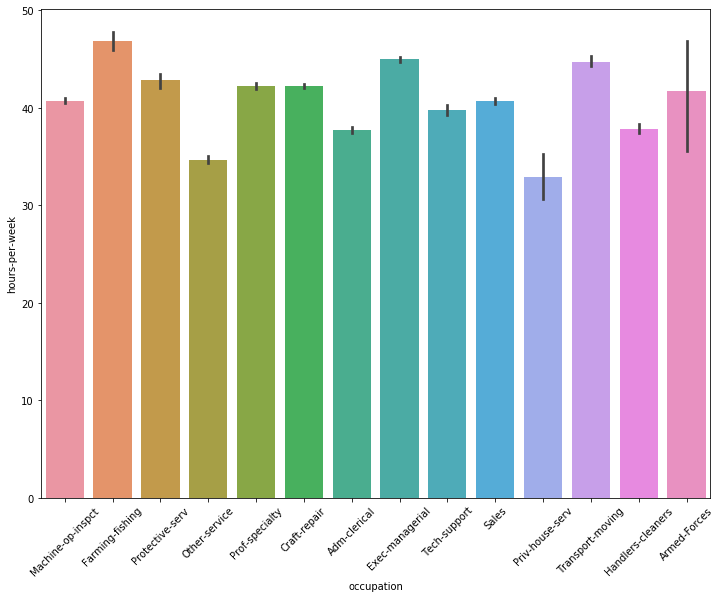

In [69]:
plt.figure(figsize=(12,9))
sns.barplot(data = adt, x='occupation', y='hours-per-week')
plt.xticks(rotation=45)
plt.show()

# Obervation
 the above bivariate barplot show:
        * Averge working hours-per-week of 14 unique categories in occupation attribute.
        * Farming-fishing has maximum average working hours-per-week around 46 in occupation attribute.
        * priv-house-serv has minimum average working hours-per-week around 33 in occupation attribute.

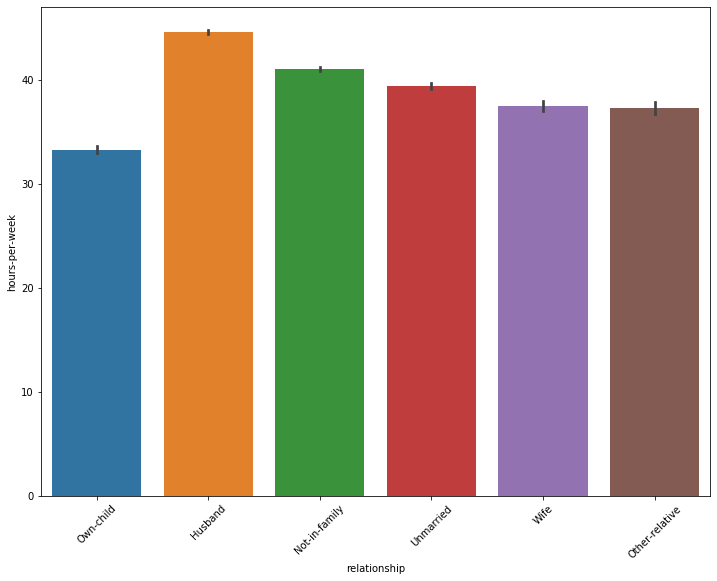

In [70]:
plt.figure(figsize=(12,9))
sns.barplot(data = adt, x='relationship', y='hours-per-week')
plt.xticks(rotation=45)
plt.show()

# Obervation
 the above bivariate barplot show:
        * Averge working hours-per-week of 6 unique categories in relationship attribute.
        * Husband has maximum average working hours-per-week around 45 in relationship attribute.
        * Own-child has minimum average working hours-per-week around 32 in relationship attribute.

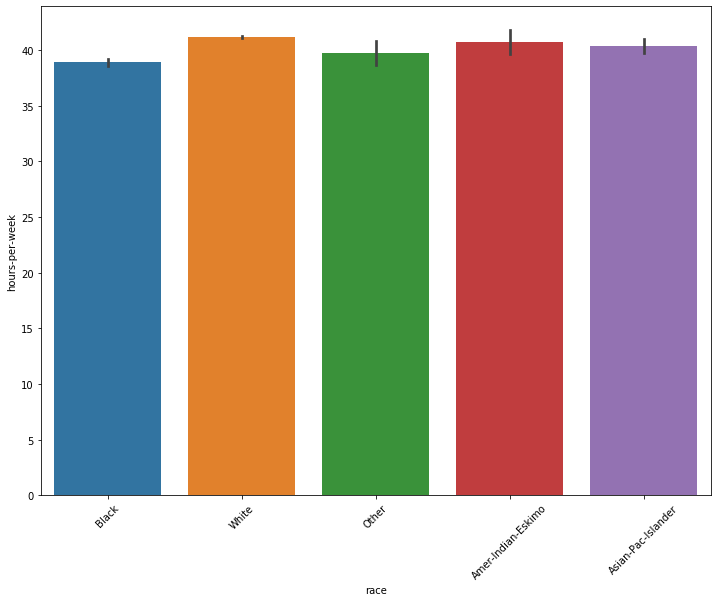

In [71]:
plt.figure(figsize=(12,9))
sns.barplot(data = adt, x='race', y='hours-per-week')
plt.xticks(rotation=45)
plt.show()

# Obervation
 the above bivariate barplot show:
        * Averge working hours-per-week of 5 unique categories in race attribute.
        * white has maximum average working hours-per-week around 42 in race attribute.
        * black has minimum average working hours-per-week around 38 in race attribute.

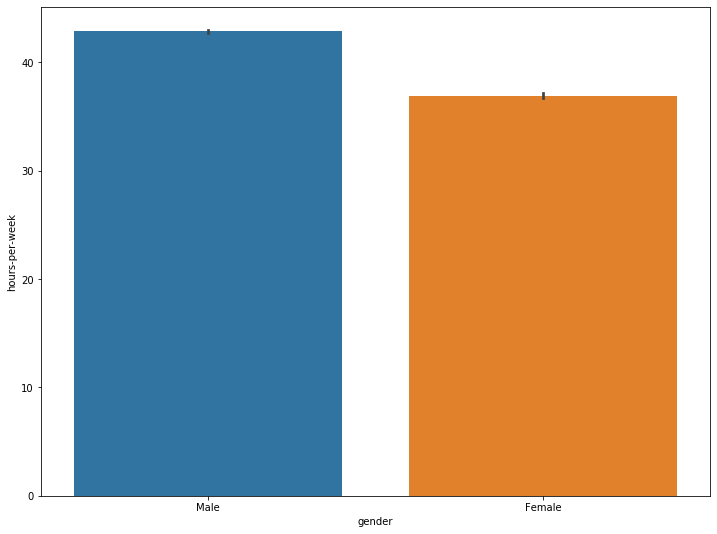

In [72]:
plt.figure(figsize=(12,9))
sns.barplot(data = adt, x='gender', y='hours-per-week')
plt.show()

# Obervation
 the above bivariate barplot show:
        * Averge working hours-per-week of 2 unique categories in gender attribute.
        * Male has maximum average working hours-per-week around 43 in gender attribute.
        * Female has minimum average working hours-per-week around 37 in gender attribute.

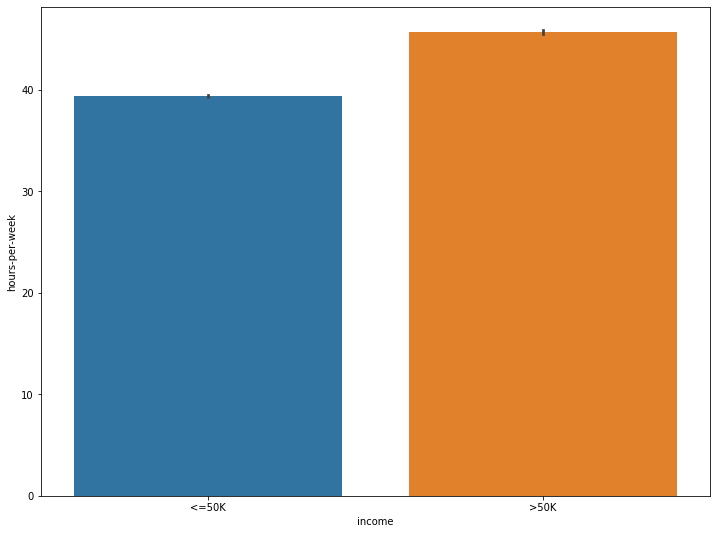

In [73]:
plt.figure(figsize=(12,9))
sns.barplot(data = adt, x='income', y='hours-per-week')
plt.show()

# Obervation
 the above bivariate barplot show:
        * Averge working hours-per-week of 2 unique categories in income attribute.
        * income(>50k) has maximum average working hours-per-week around 45 in income attribute.
        * income(<=50k) has minimum average working hours-per-week around 39 in income attribute.

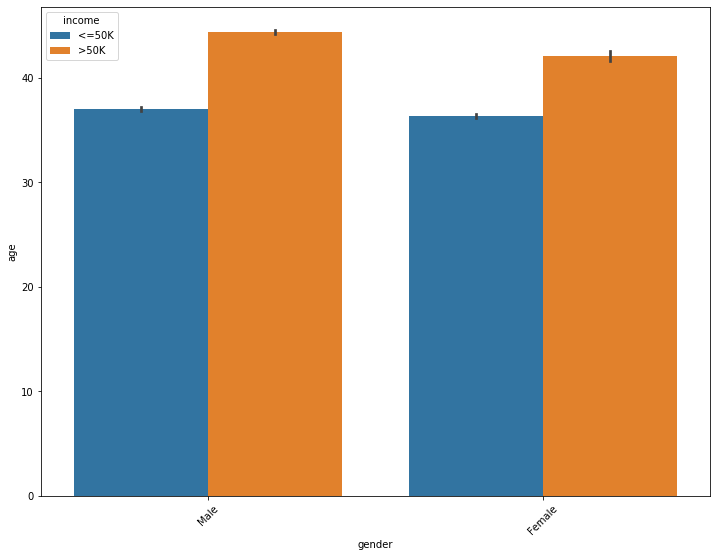

In [91]:
plt.figure(figsize=(12,9))
sns.barplot(data = adt, x='gender', y='age',hue='income')
plt.xticks(rotation=45)
plt.show()

# Obervation
 The above bivariate barplot show:
        * In male group age of male around 45 who earn >50k income and age of male around 37 who earn <=50k income.
        * In Female group age of female around 42 who earn >50k income and age of female around 37 who earn <=50k income.

# Conclusion:-
    * There are so much outliers present in 'Capital-gain' and 'Capital-loss' column.
    * the data of adult is almost belonge to US country.
    * In male group age of male around 45 who earn >50k income and age of male around 37 who earn <=50k income.
    * In Female group age of female around 42 who earn >50k income and age of female around 37 who earn <=50k income
    * income(>50k) has maximum average working hours-per-week as compared to income(<=50k).
    * Male has maximum average working hours-per-week as compared to female.

# Numerical(Normalization)

In [75]:
min_max=MinMaxScaler(feature_range=(-2,2))
min_max.fit_transform(adt['age'].values.reshape(-1,1))

array([[-1.56164384],
       [-0.84931507],
       [-1.39726027],
       ...,
       [ 0.24657534],
       [-1.7260274 ],
       [-0.08219178]])

In [76]:
min_max=MinMaxScaler(feature_range=(-2,2))
min_max.fit_transform(adt['educational-num'].values.reshape(-1,1))

array([[-0.4       ],
       [ 0.13333333],
       [ 0.93333333],
       ...,
       [ 0.13333333],
       [ 0.13333333],
       [ 0.13333333]])

In [77]:
min_max=MinMaxScaler(feature_range=(-2,2))
min_max.fit_transform(adt['hours-per-week'].values.reshape(-1,1))

array([[-0.40816327],
       [ 0.        ],
       [-0.40816327],
       ...,
       [-0.40816327],
       [-1.2244898 ],
       [-0.40816327]])

In [78]:
min_max=MinMaxScaler(feature_range=(-2,2))
min_max.fit_transform(adt['capital-gain'].values.reshape(-1,1))

array([[-2.        ],
       [-2.        ],
       [-2.        ],
       ...,
       [-2.        ],
       [-2.        ],
       [-1.39903399]])

In [79]:
min_max=MinMaxScaler(feature_range=(-2,2))
min_max.fit_transform(adt['capital-loss'].values.reshape(-1,1))

array([[-2.],
       [-2.],
       [-2.],
       ...,
       [-2.],
       [-2.],
       [-2.]])

# Categorical

In [80]:
pd.get_dummies(adt['workclass'],dummy_na=True)

,Federal-gov,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay,NaN
0,0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0
5,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
48837,0,0,1,0,0,0,0,0
48838,0,0,1,0,0,0,0,0
48839,0,0,1,0,0,0,0,0
48840,0,0,1,0,0,0,0,0


In [81]:
pd.get_dummies(adt['education'],dummy_na=True)

,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college,NaN
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
48838,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
48839,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
48840,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [82]:
pd.get_dummies(adt['marital-status'],dummy_na=True)

,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,NaN
0,0,0,0,0,1,0,0,0
1,0,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0,0
5,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...
48837,0,0,1,0,0,0,0,0
48838,0,0,1,0,0,0,0,0
48839,0,0,0,0,0,0,1,0
48840,0,0,0,0,1,0,0,0


In [83]:
pd.get_dummies(adt['occupation'],dummy_na=True)

,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,NaN
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
48838,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
48839,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
48840,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [84]:
pd.get_dummies(adt['relationship'],dummy_na=True)

,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife,NaN
0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
5,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
48837,0,0,0,0,0,1,0
48838,1,0,0,0,0,0,0
48839,0,0,0,0,1,0,0
48840,0,0,0,1,0,0,0


In [85]:
pd.get_dummies(adt['race'],dummy_na=True)

,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White,NaN
0,0,0,1,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,1,0
3,0,0,1,0,0,0
5,0,0,0,0,1,0
...,...,...,...,...,...,...
48837,0,0,0,0,1,0
48838,0,0,0,0,1,0
48839,0,0,0,0,1,0
48840,0,0,0,0,1,0


In [86]:
pd.get_dummies(adt['gender'],dummy_na=True)

,Female,Male,NaN
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
5,0,1,0
...,...,...,...
48837,1,0,0
48838,0,1,0
48839,1,0,0
48840,0,1,0


In [87]:
pd.get_dummies(adt['native-country'],dummy_na=True)

,Cambodia,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,France,...,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia,NaN
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
48838,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
48839,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
48840,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [88]:
pd.get_dummies(adt['income'],dummy_na=True)

,<=50K,>50K,NaN
0,1,0,0
1,1,0,0
2,0,1,0
3,0,1,0
5,1,0,0
...,...,...,...
48837,1,0,0
48838,0,1,0
48839,1,0,0
48840,1,0,0
